In [ ]:
%reload_ext autoreload
%autoreload 2

In [ ]:
from cpp_soft_info import get_KDEs
from Scratch import load_calibration_memory
from result_saver import SaverProvider

provider = SaverProvider()
all_memories = load_calibration_memory(provider, tobecalib_backend='ibm_sherbrooke', other_date='2021-10-30')

import pickle 
with open('all_memories.pkl', 'wb') as f:
    pickle.dump(all_memories, f)

In [28]:
import numpy as np

import pickle
from cpp_soft_info import get_KDEs

with open('all_memories.pkl', 'rb') as f:
    all_memories = pickle.load(f)

bandwiths = np.linspace(0.05, 0.9, 20)
# bandwiths = [0.1, 0.6]
# bandwiths = [0.4]*127
kde_dict = get_KDEs(all_memories, bandwiths, relError=1, absError=-1, num_points=51)

In [29]:
for i in range(127):
    print(i, kde_dict[i].bestBandwidth)

0 0.22894736842105262
1 0.1394736842105263
2 0.2736842105263158
3 0.2736842105263158
4 0.31842105263157894
5 0.36315789473684207
6 0.6763157894736842
7 0.36315789473684207
8 0.45263157894736844
9 0.31842105263157894
10 0.2736842105263158
11 0.1842105263157895
12 0.31842105263157894
13 0.36315789473684207
14 0.22894736842105262
15 0.2736842105263158
16 0.40789473684210525
17 0.1842105263157895
18 0.5868421052631579
19 0.45263157894736844
20 0.31842105263157894
21 0.22894736842105262
22 0.40789473684210525
23 0.36315789473684207
24 0.1394736842105263
25 0.1842105263157895
26 0.2736842105263158
27 0.2736842105263158
28 0.1842105263157895
29 0.2736842105263158
30 0.1842105263157895
31 0.2736842105263158
32 0.31842105263157894
33 0.1842105263157895
34 0.45263157894736844
35 0.31842105263157894
36 0.40789473684210525
37 0.22894736842105262
38 0.31842105263157894
39 0.22894736842105262
40 0.1842105263157895
41 0.1394736842105263
42 0.1842105263157895
43 0.45263157894736844
44 0.27368421052631

In [30]:
from cpp_soft_info import generate_grid_and_estimate_density

num_points = 30
num_std = 3

grid_dict = generate_grid_and_estimate_density(kde_dict, num_points, num_std)
# grid_dict

Grid generation time: 6.834e-06 seconds
KDE initialization time for qubit 0: 1.25e-06 seconds
KDE evaluation time for qubit 0: 0.0124517 seconds
Conversion to Eigen time for qubit 0: 1.875e-06 seconds
KDE initialization time for qubit 1: 1.666e-06 seconds
KDE evaluation time for qubit 1: 0.0114378 seconds
Conversion to Eigen time for qubit 1: 4.16e-07 seconds
KDE initialization time for qubit 2: 1.042e-06 seconds
KDE evaluation time for qubit 2: 0.0163943 seconds
Conversion to Eigen time for qubit 2: 7.5e-07 seconds
KDE initialization time for qubit 3: 8.33e-07 seconds
KDE evaluation time for qubit 3: 0.0146021 seconds
Conversion to Eigen time for qubit 3: 5.41e-07 seconds
KDE initialization time for qubit 4: 7.09e-07 seconds
KDE evaluation time for qubit 4: 0.0171293 seconds
Conversion to Eigen time for qubit 4: 6.25e-07 seconds
KDE initialization time for qubit 5: 5.83e-07 seconds
KDE evaluation time for qubit 5: 0.0196895 seconds
Conversion to Eigen time for qubit 5: 5.42e-07 second

# Plot the densities

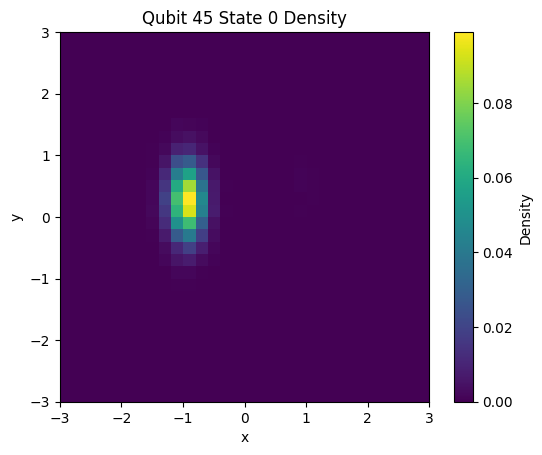

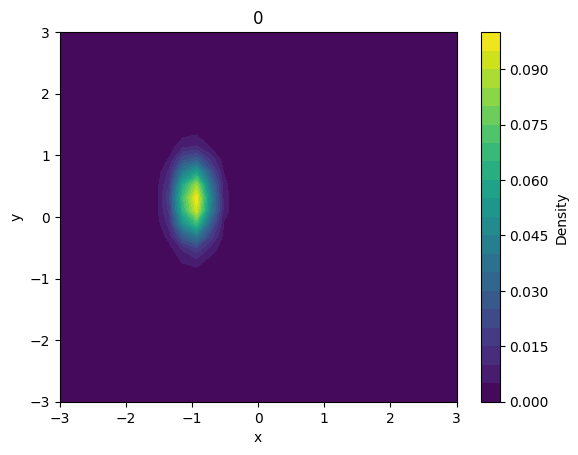

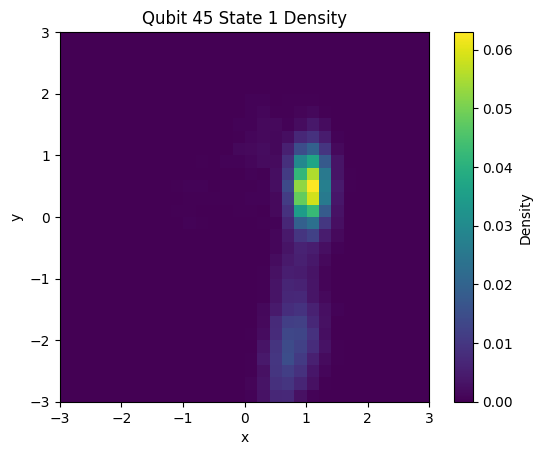

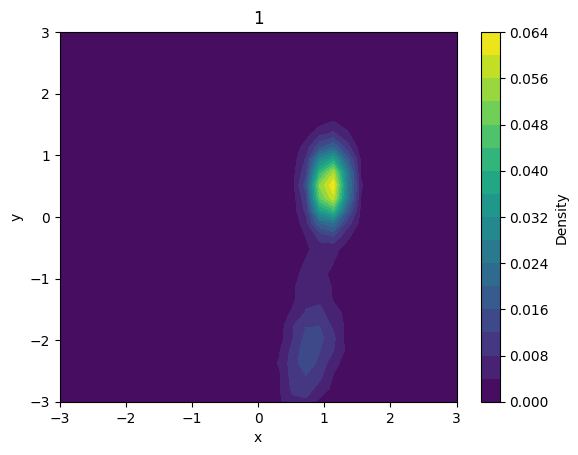

In [31]:
import numpy as np
import matplotlib.pyplot as plt

# Function to reshape and plot density
def plot_density(density, qubit_idx, state):
    density_reshaped = np.reshape(density, (num_points, num_points)).transpose()
    plt.imshow(density_reshaped, extent=[-num_std, num_std, -num_std, num_std], origin='lower')
    plt.colorbar(label='Density')
    plt.title(f'Qubit {qubit_idx} State {state} Density')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

def plot_density_contour(density, qubit_idx, state, num_points, num_std, levels=20):
    density_reshaped = np.reshape(density, (num_points, num_points)).transpose()
    x = np.linspace(-num_std, num_std, num_points)
    y = np.linspace(-num_std, num_std, num_points)
    X, Y = np.meshgrid(x, y)
    
    plt.contourf(X, Y, density_reshaped, levels=levels, cmap='viridis')  # Use plt.contour for non-filled
    plt.colorbar(label='Density')
    plt.title(state)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

# Loop through each qubit and plot the densities
for qubit_idx, (density_0, density_1) in grid_dict.items():
    if qubit_idx != 45:
        continue
    plot_density(density_0, qubit_idx, state='0')
    plot_density_contour(density_0, qubit_idx, state='0', num_points=num_points, num_std=num_std)
    plot_density(density_1, qubit_idx, state='1')
    plot_density_contour(density_1, qubit_idx, state='1', num_points=num_points, num_std=num_std)


# Plot IQ data

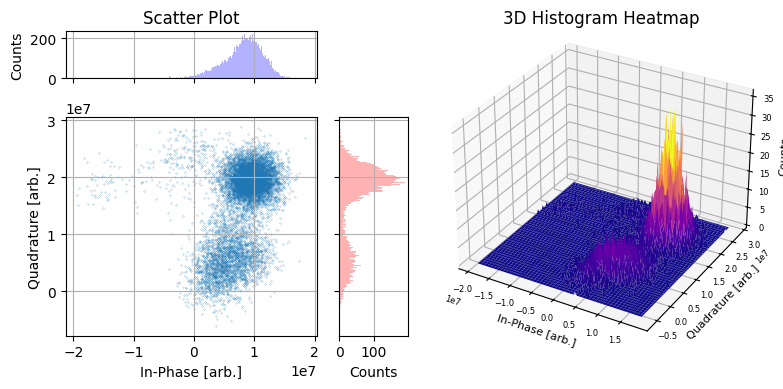

In [25]:
from soft_info import plot_IQ_data

plot_IQ_data(all_memories[45]["mmr_1"])

# relError diff plot:

In [8]:
from cpp_soft_info import generate_grid_and_estimate_density

num_points = 51
num_std = 3

kde_dict = get_KDEs(all_memories, bandwiths, relError=1, absError=-1)
grid_dict_relErr_1 = generate_grid_and_estimate_density(kde_dict, num_points, num_std)


Grid generation time: 2.0083e-05 seconds
KDE initialization time for qubit 0: 2.166e-06 seconds
KDE evaluation time for qubit 0: 0.0250584 seconds
Conversion to Eigen time for qubit 0: 4.1e-08 seconds
KDE initialization time for qubit 1: 7.5e-07 seconds
KDE evaluation time for qubit 1: 0.0430948 seconds
Conversion to Eigen time for qubit 1: 0 seconds
KDE initialization time for qubit 2: 7.5e-07 seconds
KDE evaluation time for qubit 2: 0.0376598 seconds
Conversion to Eigen time for qubit 2: 4.1e-08 seconds
KDE initialization time for qubit 3: 7.5e-07 seconds
KDE evaluation time for qubit 3: 0.0333293 seconds
Conversion to Eigen time for qubit 3: 0 seconds
KDE initialization time for qubit 4: 8.33e-07 seconds
KDE evaluation time for qubit 4: 0.0370395 seconds
Conversion to Eigen time for qubit 4: 4.1e-08 seconds
KDE initialization time for qubit 5: 8.75e-07 seconds
KDE evaluation time for qubit 5: 0.0461994 seconds
Conversion to Eigen time for qubit 5: 0 seconds
KDE initialization time f

In [ ]:
kde_dict = get_KDEs(all_memories, bandwiths, relError=-1, absError=-1)
grid_dict_relErr_None = generate_grid_and_estimate_density(kde_dict, num_points, num_std)


In [9]:
qubit = 126
logical = 1

density_relError_1 = grid_dict_relErr_1[qubit][logical]
density_relError_none = grid_dict_relErr_None[qubit][logical]


L_relErr_1 =[]
for d1, d0 in zip(grid_dict_relErr_1[qubit][1], grid_dict_relErr_1[qubit][0]):
    L_relErr_1.append(-np.log(min(d1, d0)/(max(d1, d0)+1e-8)+1e-8))
L_relErr_1 = np.array(L_relErr_1)

L_relErr_none =[]
for d1, d0 in zip(grid_dict_relErr_None[qubit][1], grid_dict_relErr_None[qubit][0]):
    L_relErr_none.append(-np.log(min(d1, d0)/(max(d1, d0)+1e-8)+1e-8))
L_relErr_none = np.array(L_relErr_none)
# L_relErr_1 = grid_dict_relErr_1[qubit][1]/(grid_dict_relErr_1[qubit][0]+1e-8)
# L_relErr_none = grid_dict_relErr_None[qubit][1]/(grid_dict_relErr_None[qubit][0]+1e-8)

L_relErr_1 =[]
for d1, d0 in zip(grid_dict_relErr_1[qubit][1], grid_dict_relErr_1[qubit][0]):
    p_soft = 1 / ( 1 + max(d1, d0)/(min(d1, d0)+1e-8))
    L_relErr_1.append(p_soft)
L_relErr_1 = np.array(L_relErr_1)

L_relErr_none =[]
for d1, d0 in zip(grid_dict_relErr_None[qubit][1], grid_dict_relErr_None[qubit][0]):
    p_soft = 1 / ( 1 + max(d1, d0)/(min(d1, d0)+1e-8))
    L_relErr_none.append(p_soft)
L_relErr_none = np.array(L_relErr_none)


plot_density_contour(L_relErr_1, qubit, state='p_soft relError = 1', num_points=num_points, num_std=num_std, levels=20)
plot_density_contour(L_relErr_none, qubit, state='p_soft relError = None', num_points=num_points, num_std=num_std, levels=20)

plot_density_contour((L_relErr_1-L_relErr_none), qubit, state='absolute error between p_softs', num_points=num_points, num_std=num_std)
plot_density_contour((L_relErr_1-L_relErr_none)/(L_relErr_1/2+L_relErr_none/2 + 1e-8), qubit, state='relativ error between p_softs', num_points=num_points, num_std=num_std)





plot_density_contour(density_relError_1, qubit, state='0 relError 1', num_points=num_points, num_std=num_std)
plot_density_contour(density_relError_none, qubit, state='0 relError None', num_points=num_points, num_std=num_std)
plot_density_contour((density_relError_1-density_relError_none)/(density_relError_1/2 + density_relError_none/2+1e-8), qubit, state='relative diff', num_points=num_points, num_std=num_std)


KeyError: 126

# Compare with python

In [ ]:
from Scratch import create_or_load_kde_grid

grid = create_or_load_kde_grid(provider, tobecalib_backend="ibm_sherbrooke", other_date="2021-10-30", num_grid_points=num_points, num_std_dev=num_std)

In [ ]:
def plot_density_contour(density, qubit_idx, num_points, num_std):
    # density_reshaped = np.reshape(density, (num_points, num_points)).transpose()
    x = np.linspace(-num_std, num_std, num_points)
    y = np.linspace(-num_std, num_std, num_points)
    X, Y = np.meshgrid(x, y)
    
    plt.contourf(X, Y, density, levels=20, cmap='viridis')  # Use plt.contour for non-filled
    plt.colorbar(label='Density')
    plt.title(f'Qubit {qubit_idx} State 0 Density')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

In [ ]:
qubit = 120

density_0_py = np.exp(grid[0][qubit].grid_density_0)

density_0_cpp = grid_dict[qubit][0]
density_0_cpp = np.reshape(density_0_cpp, (num_points, num_points)).transpose()

print(density_0_cpp.shape)
print(density_0_py.shape)


density_diff = density_0_cpp - density_0_py

plot_density_contour(density_0_cpp, qubit, num_points=num_points, num_std=num_std)
plot_density_contour(density_0_py, qubit, num_points=num_points, num_std=num_std)
plot_density_contour(density_diff, qubit, num_points=num_points, num_std=num_std)


# Speed with other function

In [ ]:
from Scratch import create_or_load_kde_grid


grid_dict_s = create_or_load_kde_grid(provider, tobecalib_backend="ibm_sherbrooke", num_grid_points=num_points, num_std_dev=num_std, other_date='2021-10-30')